In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import choices
import random


from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestCentroid
import warnings
warnings.filterwarnings('ignore')

In [267]:
class BinaryClassifiers:
    def __init__(self):
        self.all_feature_df = None
        self.model_results = {}
    
    
    def trivial(self, x_data, Xtest, ytest):
        """
        The trivial function takes in a pandas dataframe and returns the trivial prediction accuracy. 
        The function also takes in Xtest, ytest to compute the test accuracy.
        
        :param self: Access the class attributes
        :param x_data: Get the data from the training set
        :param Xtest: Test the model on unseen data
        :param ytest: Calculate the accuracy of the model
        
        """
        p0, p1 = x_data.groupby('Classes').size()/ len(x_data)
        labels  = [0, 1]
        probs = [p0, p1]
        ypred_trivial = []
        for i in range(len(Xtest)):
            ypred_trivial.append(choices(labels, probs)[0])
        test_acc = 100 - (sum(abs(ypred_trivial - ytest))*100/len(ypred_trivial))
        return test_acc


    def SVM(self, Xtrain, ytrain, Xtest, ytest):
        """
        The SVM function trains a Support Vector Machine model using the training data and 
        computes the accuracy of the model on both train and test data. It also produces a 
        confusion matrix, which is used to analyze whether there are more false positives
        or false negatives. 
        The function returns all these values as dictionaries.
        
        :param self: Reference the class object
        :param Xtrain: Train the model on a subset of the training data
        :param ytrain: Train the model on the training data
        :param Xtest: Test the model on a new dataset
        :param ytest: Calculate the accuracy of the model
        
        
        """
        
        model = SVC(kernel = 'linear')   
        model.fit(Xtrain, ytrain)
        ypred = model.predict(Xtrain)
        train_acc = 100 - (sum(abs(ypred - ytrain))*100/len(ypred))
        yhat = model.predict(Xtest)
        test_acc = 100 - (sum(abs(yhat - ytest))*100/len(yhat))    
        f1 = metrics.f1_score(ytest, yhat)
        recall = round(metrics.recall_score(ytest, yhat),2)
        conf = metrics.confusion_matrix(ytest, yhat, labels=[0, 1])
        return train_acc, test_acc, f1, recall, conf

    def RandomForest(self, Xtrain, ytrain):
        """
        The RandomForest function fits a RandomForestClassifier model using the training data, 
        then makes predictions on the test data and prints an evaluation of the model.
        The function returns nothing.
        
        :param self: Reference the class itself
        :param Xtrain: Train the model on a set of data
        :param ytrain: Train the model
        :param Xtest: Test the model on a different set of data than the training data
        :param ytest: Test the model
        :return: The importance of each feature
        """
        
        model = RandomForestClassifier()
        model.fit(Xtrain, ytrain)
        importance = model.feature_importances_
        return importance

    def KNN(self, Xtrain, ytrain, Xtest, ytest):
        """
        The KNN function fits a KNN classifier with k=2, and calculates the accuracy of the model on both train and test data.
        The function also prints out a confusion matrix for the model.
        
        :param self: Reference the class itself
        :param Xtrain: Train the model
        :param ytrain: Pass the correct labels of the training data
        :param Xtest: Test the model on a new dataset
        :param ytest: Calculate the accuracy of the model
        :return: The accuracy of the model on the test data and also returns a confusion matrix
        
        """
        model = KNeighborsClassifier(n_neighbors=2)
        model.fit(Xtrain, ytrain)
        ypred = model.predict(Xtrain)
        train_acc = 100 - (sum(abs(ypred - ytrain))*100/len(ypred))
        yhat = model.predict(Xtest)
        test_acc = 100 - (sum(abs(yhat - ytest))*100/len(yhat))    
        f1 = metrics.f1_score(ytest, yhat)
        recall = round(metrics.recall_score(ytest, yhat),2)
        conf = metrics.confusion_matrix(ytest, yhat, labels=[0, 1])
        return train_acc, test_acc, f1, recall, conf

    
    def NaiveBayes(self, Xtrain, ytrain, Xtest, ytest):
        """
        The NaiveBayes function fits a Naive Bayes model to the training data and returns 
        the predictions of the test set. The function takes in four parameters: Xtrain, ytrain, Xtest, and ytest. 
        The parameters are DataFrames for the features of the training set (Xtrain), labels for training set (ytrain), 
        features of test set (Xtest) and labels for test set(ytest). The function returns two values: train_accuracy 
        and test_accuracy. These are scalar values which represent how well each classifier performed on their given data sets.
        
        :param self: Reference the class itself
        :param Xtrain: Train the model
        :param ytrain: Train the model on the training data
        :param Xtest: Test the model
        :param ytest: Test the accuracy of the model
        :return: The accuracy of the model, as well as the f-score and confusion matrix
        
        """
        model = GaussianNB()
        model.fit(Xtrain, ytrain)
        ypred = model.predict(Xtrain)
        train_acc = 100 - (sum(abs(ypred - ytrain))*100/len(ypred))
        yhat = model.predict(Xtest)
        test_acc = 100 - (sum(abs(yhat - ytest))*100/len(yhat))    
        f1 = metrics.f1_score(ytest, yhat)
        recall = round(metrics.recall_score(ytest, yhat),2)
        conf = metrics.confusion_matrix(ytest, yhat, labels=[0, 1])
        return train_acc, test_acc, f1, recall, conf


    def MLP(self, Xtrain, ytrain, Xtest, ytest):
        """
        The MLP function takes in a training set and a test set, as well as the number of 
        hidden layers and nodes for the model. It then trains an MLP classifier on the training data, 
        predicts labels for both train and test sets, calculates accuracy scores for each prediction 
        (both overall accuracy score and F-score), prints out confusion matrices to show how many 
        true/false positives/negatives were predicted by the model.
        
        :param self: Reference the class object
        :param Xtrain: Train the model with the training data
        :param ytrain: Train the model with the training data
        :param Xtest: Test the model on a new dataset
        :param ytest: Calculate the accuracy of the model
        
        
        """
        model = MLPClassifier(hidden_layer_sizes=(30, 10), max_iter=1000,activation = 'relu', solver='adam',random_state=1)
        model.fit(Xtrain, ytrain)
        ypred = model.predict(Xtrain)
        train_acc = 100 - (sum(abs(ypred - ytrain))*100/len(ypred))
        yhat = model.predict(Xtest)
        test_acc = 100 - (sum(abs(yhat - ytest))*100/len(yhat))    
        f1 = metrics.f1_score(ytest, yhat)
        recall = round(metrics.recall_score(ytest, yhat),2)
        conf = metrics.confusion_matrix(ytest, yhat, labels=[0, 1])
        return train_acc, test_acc, f1, recall, conf


    def SL_Perceptron(self, Xtrain, ytrain, Xtest, ytest):
        """
        The SL_Perceptron function trains a perceptron model on the training data, 
        makes predictions on the test data and computes an F-score. The function also 
        computes the train and test accuracy of the model. The function returns these 
        values in a list: [train_accuracy, test_accuracy, fscore]
        
        :param self: Access the variables and methods of the same object
        :param Xtrain: Train the model with the training data
        :param ytrain: Train the model
        :param Xtest: Test the model
        :param ytest: Calculate the accuracy of the model
        
        
        """
        clf = Perceptron(fit_intercept = False)
        clf.fit(Xtrain, ytrain)
        train_acc = clf.score(Xtrain, ytrain)*100
        test_acc = clf.score(Xtest, ytest)*100
        yhat = clf.predict(Xtest)
        f1 = metrics.f1_score(ytest, yhat)
        recall = round(metrics.recall_score(ytest, yhat),2)
        conf = metrics.confusion_matrix(ytest, yhat, labels=[0, 1])
        return train_acc, test_acc, f1, recall, conf

    def DecisionTreeClassifier(self, Xtrain, ytrain, Xtest, ytest):
        """
        The DecisionTreeClassifier function trains a Decision Tree Classifier
        model using the training data. It then calculates the accuracy of the
        model on both train and test data, as well as F-score, recall score, 
        and confusion matrix.
        
        
        :param self: Reference the class object
        :param Xtrain: Train the model on a training set
        :param ytrain: Train the model on a subset of data
        :param Xtest: Test the model on unseen data
        :param ytest: Calculate the accuracy of the model
        """
        clf = DecisionTreeClassifier()
        clf.fit(Xtrain, ytrain)
        train_acc = clf.score(Xtrain, ytrain)*100
        test_acc = clf.score(Xtest, ytest)*100
        yhat = clf.predict(Xtest)
        f1 = metrics.f1_score(ytest, yhat)
        recall = round(metrics.recall_score(ytest, yhat),2)
        conf = metrics.confusion_matrix(ytest, yhat, labels=[0, 1])
        return train_acc, test_acc, f1, recall, conf


    def NMeans(self, Xtrain, ytrain, Xtest, ytest):
        """
        The NMeans function takes in a training set and test set, fits the model to the training data, predicts on the test data, and returns a variety of accuracy metrics.
        
        
        :param self: Reference the class itself
        :param Xtrain: Train the model
        :param ytrain: Pass the correct labels for the training data
        :param Xtest: Specify the test data to be used for predictions
        :param ytest: Calculate the accuracy of the model
        """
       
        model = NearestCentroid()
        model.fit(Xtrain, ytrain)
        ypred = model.predict(Xtrain)
        train_acc = 100 - (sum(abs(ypred - ytrain))*100/len(ypred))
        yhat = model.predict(Xtest)
        test_acc = 100 - (sum(abs(yhat - ytest))*100/len(yhat))    
        f1 = metrics.f1_score(ytest, yhat)
        recall = round(metrics.recall_score(ytest, yhat),2)
        conf = metrics.confusion_matrix(ytest, yhat, labels=[0, 1])
        return train_acc, test_acc, f1, recall, conf



    def kfold_validation(self, Xtrain, ytrain, window, n_fold, model):
        """
        The kfold_validation function takes in the training data, validation data, a window size (in days), 
        and number of folds. It then splits the training data into n_fold equal sized parts and uses each part 
        as a validation set. The model is trained on all other parts of the training set. The function returns 
        two lists: train_accuracy and val_accuracy which contain accuracy scores for each fold.
        
        :param self: Reference the class object
        :param Xtrain: Pass the training data
        :param ytrain: Calculate the accuracy of the model on training data
        :param window: Define the number of days to look back for each prediction
        :param n_fold: Specify the number of folds in k-fold cross validation
        :param model: Specify which model to use
        """
        train_acc_kfold = []
        val_acc_kfold = []
        window_days = window * 2
        train_len = len(Xtrain)
        
        for i in range(n_fold):
            val_start_index = np.int(i*np.floor(len(Xtrain)/n_fold))
            val_end_index = val_start_index + np.int(np.floor(len(Xtrain)/n_fold))
            Xval = Xtrain[val_start_index:val_end_index]
            yval = ytrain[val_start_index:val_end_index]

            if (i!=0):
                Xtrain_kfold = Xtrain[np.r_[:val_start_index - window_days, val_end_index + window_days:train_len]]
                ytrain_kfold = ytrain[np.r_[:val_start_index - window_days, val_end_index + window_days:train_len]]
                
            else:
                Xtrain_kfold = Xtrain[np.r_[val_end_index + window_days:train_len]]
                ytrain_kfold = ytrain[np.r_[val_end_index + window_days:train_len]]

            model.fit(Xtrain_kfold, ytrain_kfold)
            ypred = model.predict(Xtrain)
            ypred_val = model.predict(Xval)
            train_acc_kfold.append(100 - (sum(abs(ypred - ytrain))*100/len(ypred)))
            val_acc_kfold.append(100 - (sum(abs(ypred_val - yval))*100/len(ypred)))
        
        return np.mean(train_acc_kfold)

    def runner(self, Xtrain, ytrain, ytest, model_name):    
        res = {}
        train_acc, test_acc, f1, recall, conf = self.NaiveBayes(Xtrain, ytrain, ytest)
        res["NaiveBayes"] = {
                            "Train Accuracy": train_acc,
                            "Test Accuracy": test_acc,
                            "F1 Score": f1

                            }
        train_acc, test_acc, f1, recall, conf =self.SL_Perceptron(Xtrain, ytrain, ytest)
        res["Perceptron"] = {
                            "Train Accuracy": train_acc,
                            "Test Accuracy": test_acc,
                            "F1 Score": f1

                            }
    
        train_acc, test_acc, f1, recall, conf =self.KNN(Xtrain, ytrain, ytest)
        res["KNN"] = {
                            "Train Accuracy": train_acc,
                            "Test Accuracy": test_acc,
                            "F1 Score": f1

                            }
        
        train_acc, test_acc, f1, recall, conf =self.SVM(Xtrain, ytrain, ytest)
        res["SVM"] = {
                            "Train Accuracy": train_acc,
                            "Test Accuracy": test_acc,
                            "F1 Score": f1,
                            "Recall": recall

                            }
        self.model_results[model_name] = res

class FeatureEngineering:
    def __init__(self, train_path, test_path):
        """
        The __init__ function is called automatically every time the class is 
        instantiated. It can take arguments that become instance attributes. In this 
        case, we are passing it a dataframe of our training data.
        
        :param self: Represent the instance of the object itself
       
        """
        self.all_feature_df = None
        self.train_data = None
        self. test_data = None
        self.AFF_data = None
        self.train_path = train_path
        self.test_path = test_path

    def read_data(self):      
        """
        The read_data function reads in the data from the csv files and concatenates them into one DataFrame.
        The new_features list is also created, which will be used to create rolling averages of features.
        
        :param self: Reference a class instance's attributes and methods
        :return: A concatenated dataframe of both the train and test data
        
        """
        self.train_data = pd.read_csv('algerian_fires_train.csv')
        self. test_data = pd.read_csv('algerian_fires_test.csv')
        
        

    def feature_expansion(self):
        """
        Expands the feature set by creating new features from Temperature, Rain, Wind Speed, Humidity
        by using rolling average.
        
        :param self: Access the class attributes
        """
        self.AFF_data = pd.concat([self.train_data, self.test_data])
        new_features = []
        for feature in ["Temperature", "Rain", "RH", "Ws"]:
            for roling_avg in range(1, 8):
                new_features.append(feature+str(roling_avg))
        self.all_feature_df = self.gen_features(new_features, pd.concat([self.train_data, self.test_data]))
        return self.AFF_data, self.all_feature_df
        
    
    def gen_features(self, parse_strings, x_train_df):
        """
        The gen_features function takes a list of strings as input, and returns the same list of features with 
        rolling averages calculated for each feature. The rolling average is calculated over the last n rows in that 
        feature's column, where n is equal to the number after the underscore in each string. For example, if we have a 
        string &quot;Temperature_5&quot;, then this means that we are calculating an average over 5 days worth of temperature data.
        
        :param self: Reference the class itself
        :param parse_strings: Specify the features that are to be generated
        :param x_train_df: Store the dataframe that is created by the gen_features function
        :param drop=&quot;&quot;: Drop the first n rows of the dataframe
        :return: The dataframe with the rolling mean of each column
        """
        
        for parse_string in parse_strings:
            x_train_df_copy = x_train_df.copy()
            feature = x_train_df_copy[parse_string[:-1]].to_frame()
            x_train_df_copy[parse_string] = feature.rolling(int(parse_string[-1]), 1).mean()
            window = int(parse_string[-1])

            
            x_train_df_copy['Date'] = pd.to_datetime(x_train_df['Date'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')
            rt = x_train_df_copy[['Date',parse_string[:-1]]].copy()
            rt = rt.groupby('Date').sum(parse_string[:-1]).reset_index()
            rt[parse_string] = rt[parse_string[:-1]].rolling(window, 1).mean().shift()
            rt[parse_string] = rt[parse_string].fillna(0)
            rt[parse_string] = rt[parse_string]/2
            temp_d = []
            for i in list(rt[parse_string]):
                temp_d.append(i)
                temp_d.append(i)
            x_train_df[parse_string] = temp_d

            # rr = AFF_data[['Date','Rain']].copy()
            # rr = rr.groupby('Date').sum('Rain').reset_index()
            # rr['Rain7'] = rr['Rain'].rolling(window,1).mean().shift()
            # rr['Rain7'] = rr['Rain7'].fillna(0)
            # rr['Rain7'] = rr['Rain7']/2

            AFF_data_ma = x_train_df_copy.merge(rt[['Date', parse_string]], right_on = 'Date', left_on='Date')
            # AFF_data_ma = AFF_data_ma.merge(rr[['Date', 'Rain7']], right_on = 'Date', left_on='Date')
            x_train_df_copy = AFF_data_ma.copy()
            


        x_train_df.rename(columns={"Temperature": "Temperature0", "Rain": "Rain0", "Ws":"Ws0", "RH":"RH0"}, inplace = True)
        return x_train_df
        

    def preprocess(self, temp_list):
        """
        The preprocess function takes in a list of column names and returns the scaled data.
        The function also takes in the train and test data, which is used to scale all features.
        The scaler is fit on the training data, then applied to both sets of data.
        
        :param self: Access the variables and methods of the class in python
        :param temp_list: Select the features that will be used in the model
        :return: The scaled training and testing data
        """
        scaler = preprocessing.StandardScaler()
        scaled = scaler.fit_transform(self.all_feature_df[temp_list])
        Xtrain = scaled[:184]
        ytrain = self.train_data['Classes'][:184]
        Xtest = scaled[188:]
        ytest = self.test_data['Classes'][4:]  
        
        return Xtrain, ytrain, Xtest, ytest

    
 

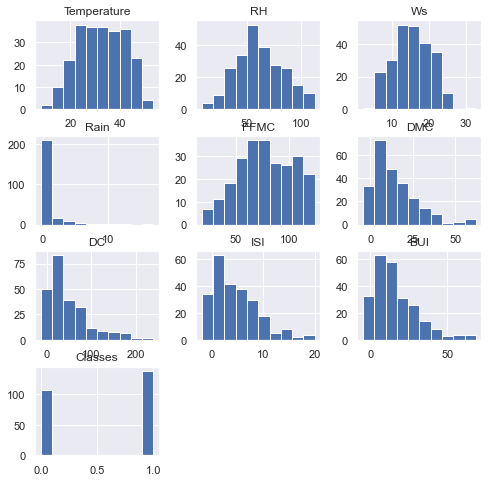

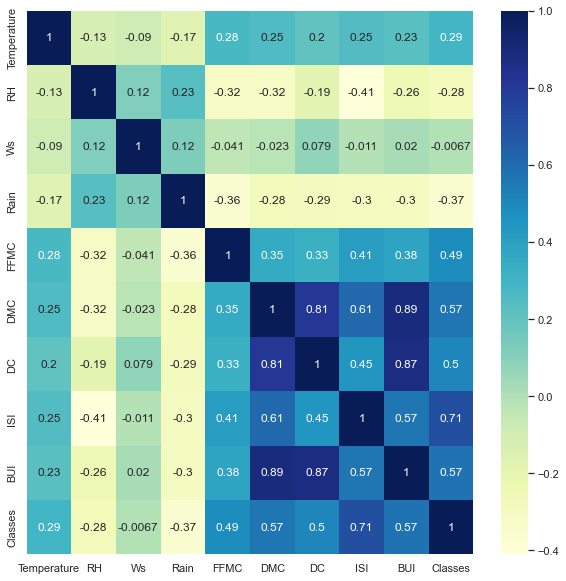

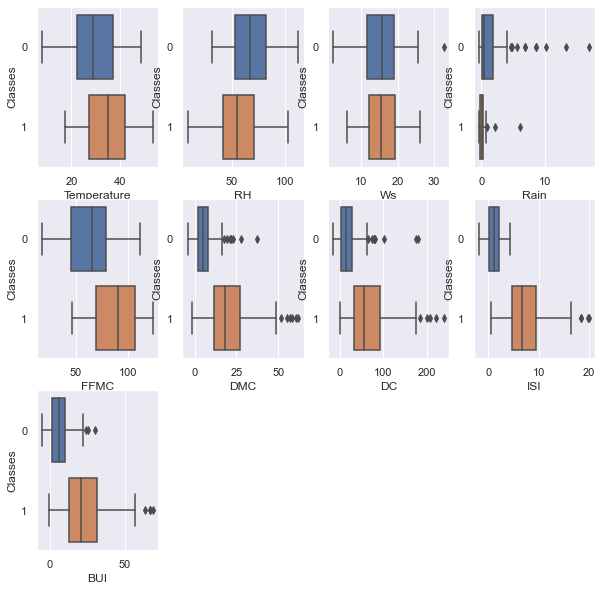

In [269]:
data = FeatureEngineering('algerian_fires_train.csv', 'algerian_fires_test.csv')
classifier = BinaryClassifiers()


data.read_data()
features, expanded_features = data.feature_expansion()
features.hist(figsize=(8,8))
plt.show()
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(features.corr(), cmap="YlGnBu",annot=True)
plt.show()
sns.set(rc = {'figure.figsize':(10,10)})
count = 1
for col in features.select_dtypes(include='float64'):
    plt.subplot(3,4,count)
    sns.boxplot(y = features['Classes'].astype('category'), x = col, data=features)
    count+=1
plt.show()

In [227]:
expanded_features.head(16)

,Date,Temperature0,RH0,Ws0,Rain0,FFMC,DMC,DC,ISI,BUI,...,RH5,RH6,RH7,Ws1,Ws2,Ws3,Ws4,Ws5,Ws6,Ws7
0,01/06/2012,18.952399,43.855865,12.292536,-0.340306,73.063752,-2.371083,28.543573,0.487246,6.225461,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,01/06/2012,34.498610,46.230441,14.838211,0.939652,56.027977,0.441002,-10.007636,-1.472158,2.268104,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,02/06/2012,15.258665,57.084279,10.968696,1.397913,33.114404,3.389994,-13.774588,1.338737,-3.327908,...,45.043153,45.043153,45.043153,13.565373,13.565373,13.565373,13.565373,13.565373,13.565373,13.565373
3,02/06/2012,24.847936,99.910000,17.924025,3.958666,26.148986,5.179630,-1.392789,-0.755090,0.131303,...,45.043153,45.043153,45.043153,13.565373,13.565373,13.565373,13.565373,13.565373,13.565373,13.565373
4,03/06/2012,19.381227,104.398680,23.740540,13.394723,28.658020,-2.247164,-3.432689,0.558249,-1.928471,...,61.770146,61.770146,61.770146,14.446360,14.005867,14.005867,14.005867,14.005867,14.005867,14.005867
5,03/06/2012,41.100323,72.071701,17.605822,2.046936,71.234188,5.110650,29.392823,-0.182703,2.785474,...,61.770146,61.770146,61.770146,14.446360,14.005867,14.005867,14.005867,14.005867,14.005867,14.005867
6,04/06/2012,19.038842,67.336851,17.482233,2.273605,34.222983,1.767097,4.310680,-1.869065,6.780638,...,70.591828,70.591828,70.591828,20.673181,17.559771,16.228305,16.228305,16.228305,16.228305,16.228305
7,04/06/2012,38.808710,66.252407,18.786801,-0.217015,79.137628,3.403384,7.600304,1.212227,2.014532,...,70.591828,70.591828,70.591828,20.673181,17.559771,16.228305,16.228305,16.228305,16.228305,16.228305
8,05/06/2012,26.742422,103.920124,13.327026,-0.254259,65.985175,-2.474512,-1.149105,0.456845,8.948538,...,69.642528,69.642528,69.642528,18.134517,19.403849,17.751353,16.704858,16.704858,16.704858,16.704858
9,05/06/2012,40.902608,68.450348,20.315958,0.147903,45.562802,8.227194,20.577706,3.455350,12.660480,...,69.642528,69.642528,69.642528,18.134517,19.403849,17.751353,16.704858,16.704858,16.704858,16.704858


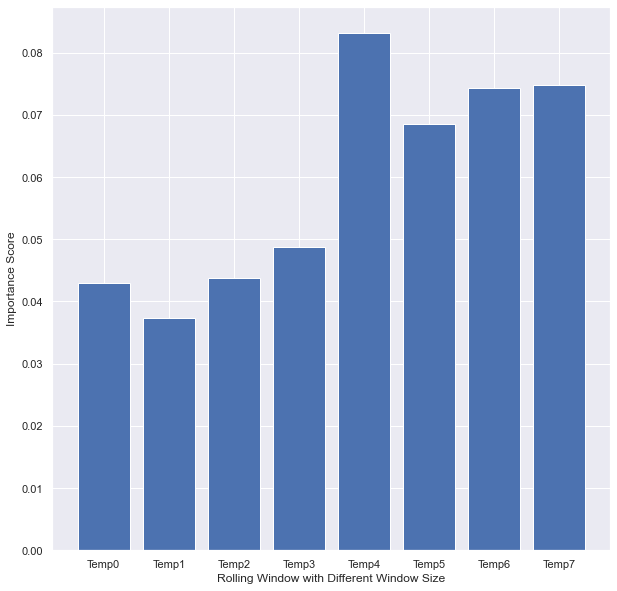

In [112]:
#After first step of feature engineering, We are calculating importance score for each variable

random.seed(27)
li = []
for i in range(8):
    temp_list = ['FFMC', 'DMC', 'DC',  'ISI', 'Temperature'+str(i), 'Ws0', 'RH0', 'Rain0']
    Xtrain, ytrain, Xtest, ytest = data.preprocess(temp_list)
    importance = classifier.RandomForest(Xtrain, ytrain)
    li.append(importance[4])

plt.bar(['Temp' + str(i) for i in range(8)], li)
plt.xlabel('Rolling Window with Different Window Size')
plt.ylabel('Importance Score')
plt.show()   
    

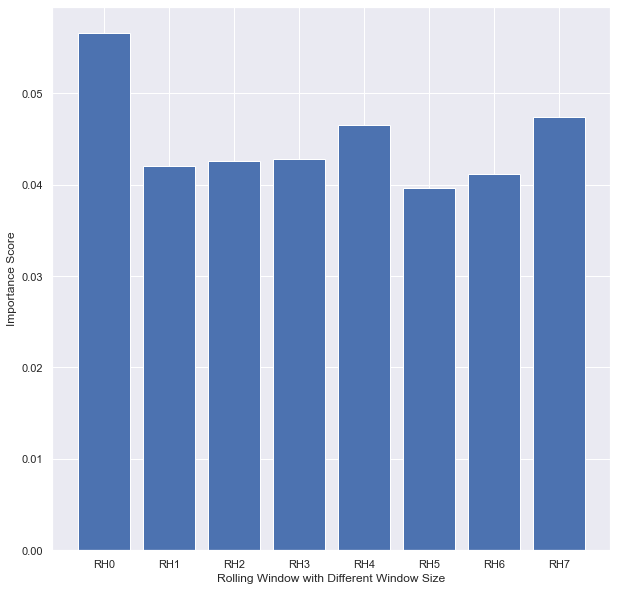

In [121]:
random.seed(32)
li = []
for i in range(8):
    temp_list = ['FFMC', 'DMC', 'DC',  'ISI', 'Temperature0', 'Ws0', 'RH'+str(i), 'Rain0']
    Xtrain, ytrain, Xtest, ytest = data.preprocess(temp_list)
    importance = classifier.RandomForest(Xtrain, ytrain)
    li.append(importance[4])

plt.bar(['RH' + str(i) for i in range(8)], li)
plt.xlabel('Rolling Window with Different Window Size')
plt.ylabel('Importance Score')
plt.show()

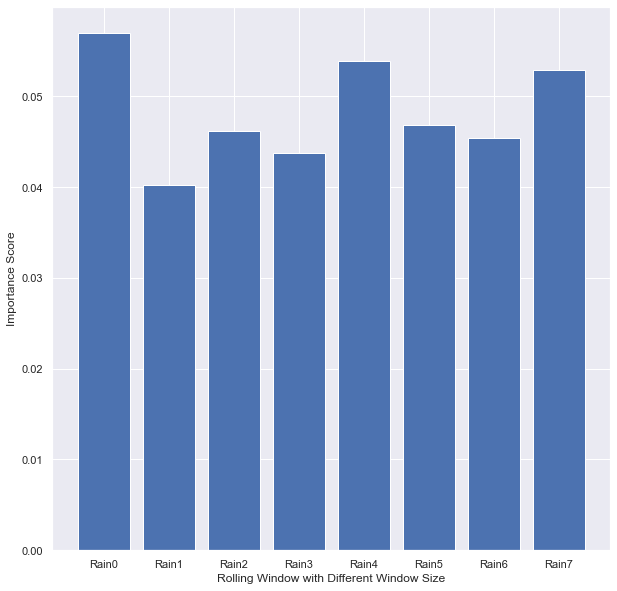

In [133]:
random.seed(32)
li = []
for i in range(8):
    temp_list = ['FFMC', 'DMC', 'DC',  'ISI', 'Temperature0', 'Ws0', 'RH0', 'Rain'+str(i)]
    Xtrain, ytrain, Xtest, ytest = data.preprocess(temp_list)
    importance = classifier.RandomForest(Xtrain, ytrain)
    li.append(importance[4])
plt.bar(['Rain' + str(i) for i in range(8)], li)
plt.xlabel('Rolling Window with Different Window Size')
plt.ylabel('Importance Score')
plt.show()

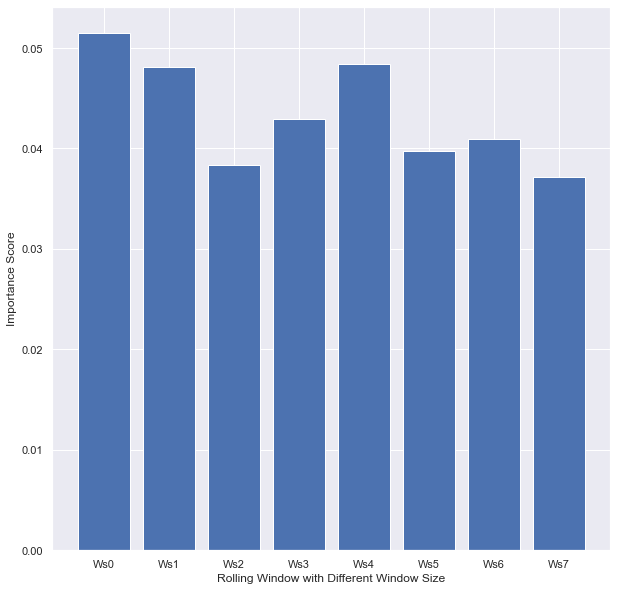

In [159]:
random.seed(32)
li = []
for i in range(8):
    temp_list = ['FFMC', 'DMC', 'DC',  'ISI', 'Temperature0', 'Ws'+str(i), 'RH0', 'Rain0']
    Xtrain, ytrain, Xtest, ytest = data.preprocess(temp_list)
    importance = classifier.RandomForest(Xtrain, ytrain)
    li.append(importance[4])

plt.bar(['Ws' + str(i) for i in range(8)], li)
plt.xlabel('Rolling Window with Different Window Size')
plt.ylabel('Importance Score')
plt.show()

<BarContainer object of 16 artists>

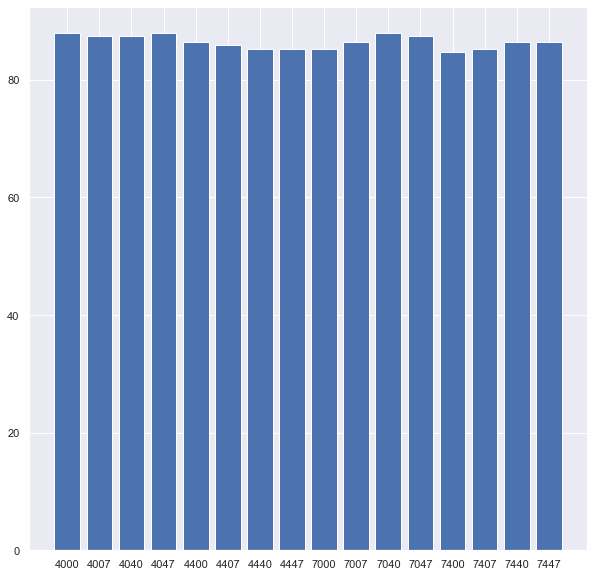

In [250]:
#Feature Set Selection with Training Accuracy
a = ['Temperature4', 'Temperature7']
b = ['Rain0','Rain4']
c = ['Ws0', 'Ws4']
d = ['RH0', 'RH7']
test_acc = []
model_name = []
for i in a:
    for j in b:
        for k in c:
            for l in d:
               Xtrain, ytrain, Xtest, ytest = data.preprocess(['FFMC', 'DMC', 'DC', 'ISI', i, j, k, l])
               ts, _, _, _, _ = classifier.NMeans(Xtrain, ytrain, Xtest, ytest )
               test_acc.append(ts)
               model_name.append(i[-1]+j[-1]+k[-1]+l[-1])
plt.bar(model_name, test_acc)

#We find that Temperature 4, RH0, Wind0, Rain0 is giving good result

In [259]:
final_feature = ['Temperature4', 'Rain0', 'Ws0', 'RH0']
Xtrain, ytrain, Xtest, ytest = data.preprocess(['FFMC', 'DMC', 'DC', 'ISI', i, j, k, l])
print("\n######### Baseline Nmeans From the paper ###########")
tr, ts, f1, re, conf = classifier.NMeans(Xtrain, ytrain, Xtest, ytest )
print(f"Training Accuracy: {tr}")
print(f"F1 Score: {f1}")
print(f"RECALL : {re}")
print(f"Confusion Matrix : {conf}")
print("\n######### SVM ###########")
tr, ts, f1, re, conf = classifier.SVM(Xtrain, ytrain, Xtest, ytest )
print(f"Training Accuracy: {tr}")
print(f"F1 Score: {f1}")
print(f"RECALL : {re}")
print(f"Confusion Matrix : {conf}")
print("\n######### Naive Bayes ###########")
tr, ts, f1, re, conf = classifier.NaiveBayes(Xtrain, ytrain, Xtest, ytest )
print(f"Training Accuracy: {tr}")
print(f"F1 Score: {f1}")
print(f"RECALL : {re}")
print(f"Confusion Matrix : {conf}")
print("\n######### Perceptron ###########")
tr, ts, f1, re, conf = classifier.SL_Perceptron(Xtrain, ytrain, Xtest, ytest )
print(f"Training Accuracy: {tr}")
print(f"F1 Score: {f1}")
print(f"RECALL : {re}")
print(f"Confusion Matrix : {conf}")
print("\n######### KNN ###########")
tr, ts, f1, re, conf = classifier.KNN(Xtrain, ytrain, Xtest, ytest )
print(f"Training Accuracy: {tr}")
print(f"F1 Score: {f1}")
print(f"RECALL : {re}")
print(f"Confusion Matrix : {conf}")



######### Baseline Nmeans From the paper ###########
Training Accuracy: 86.41304347826087
F1 Score: 0.717948717948718
RECALL : 0.61
Confusion Matrix : [[31  2]
 [ 9 14]]

######### SVM ###########
Training Accuracy: 92.93478260869566
F1 Score: 0.8636363636363636
RECALL : 0.83
Confusion Matrix : [[31  2]
 [ 4 19]]

######### Naive Bayes ###########
Training Accuracy: 91.84782608695652
F1 Score: 0.8372093023255814
RECALL : 0.78
Confusion Matrix : [[31  2]
 [ 5 18]]

######### Perceptron ###########
Training Accuracy: 85.32608695652173
F1 Score: 0.761904761904762
RECALL : 0.7
Confusion Matrix : [[30  3]
 [ 7 16]]

######### KNN ###########
Training Accuracy: 92.93478260869566
F1 Score: 0.761904761904762
RECALL : 0.7
Confusion Matrix : [[30  3]
 [ 7 16]]


In [265]:

window = 4

AFF_data = pd.concat([data.train_data, data.test_data])
AFF_data['Date'] = pd.to_datetime(AFF_data['Date'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')
rt = AFF_data[['Date','Temperature']].copy()
rt = rt.groupby('Date').sum('Temperature').reset_index()
rt['Temp_ra'] = rt['Temperature'].rolling(window,1).mean().shift()
rt['Temp_ra'] = rt['Temp_ra'].fillna(0)
rt['Temp_ra'] = rt['Temp_ra']/2

AFF_data_ma = AFF_data.merge(rt[['Date', 'Temp_ra']], right_on = 'Date', left_on='Date')
AFF_data = AFF_data_ma.copy()

AFF_scaler = preprocessing.StandardScaler()
AFF_scaled = AFF_scaler.fit_transform(AFF_data[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI','BUI']])


AFF_scaled1 = pd.DataFrame(AFF_scaled).reset_index()
del(AFF_scaled1['index'])
AFF_scaled1.columns = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI','BUI']
AFF_scaled1['Classes'] = AFF_data['Classes']
imp_cols = ['Rain','RH', 'Ws', 'FFMC', 'DMC', 'DC', 'ISI', 'Temp_ra']
scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(AFF_data[imp_cols])
train_len = len(data.train_data)

Xtrain = scaled[:train_len - window*2 + 1]
ytrain = data.train_data['Classes'][:train_len - window*2 + 1]

Xtest = scaled[train_len:]
ytest = data.test_data['Classes']




# Final Results

### SVM

In [276]:
model = SVC(kernel = 'linear')

print('CV accuracy: %.2f' %classifier.kfold_validation(Xtrain, ytrain, window, 3, model))

model.fit(Xtrain, ytrain)
yhat = model.predict(Xtest)
print('Test accuracy: %.2f' % (100 - (sum(abs(yhat - ytest))*100/len(yhat))))

# print(metrics.classification_report(ytest, yhat, target_names=['No Fire', 'Fire']))
print("Balanced F1 score: ",round(metrics.f1_score(ytest, yhat),2))
print("Recall score: ",round(metrics.recall_score(ytest, yhat),2))
print("Confusion Matrix: \n",metrics.confusion_matrix(ytest, yhat, labels=[0, 1]))

CV accuracy: 93.97
Test accuracy: 93.33
Balanced F1 score:  0.91
Recall score:  0.87
Confusion Matrix: 
 [[36  1]
 [ 3 20]]


## KNN

In [272]:
model = KNeighborsClassifier(n_neighbors=2)

model.fit(Xtrain, ytrain)
ypred = model.predict(Xtrain)
print('Train accuracy: %.3f' % (100 - (sum(abs(ypred - ytrain))*100/len(ypred))))

print('CV accuracy: %.2f' %classifier.kfold_validation(Xtrain, ytrain, window, 6, model))

# ypred_val = model.predict(Xval)
# print('Validation accuracy: %.3f' % (100 - (sum(abs(ypred_val - yval))*100/len(ypred))))

yhat = model.predict(Xtest)
print('Test accuracy: %.3f' % (100 - (sum(abs(yhat - ytest))*100/len(yhat))))

print("Balanced F1 score: ",round(metrics.f1_score(ytest, yhat),2))
print("Recall score: ",round(metrics.recall_score(ytest, yhat),2))
print("Confusion Matrix: \n",metrics.confusion_matrix(ytest, yhat, labels=[0, 1]))

Train accuracy: 93.220
CV accuracy: 92.09
Test accuracy: 81.667
Balanced F1 score:  0.73
Recall score:  0.65
Confusion Matrix: 
 [[34  3]
 [ 8 15]]


## Single Layer Perceptron

In [273]:
from sklearn.linear_model import Perceptron

clf = Perceptron(fit_intercept = False)
clf.fit(Xtrain, ytrain)
yhat = clf.predict(Xtest)

print('Perceptron Train accuracy: ', round(clf.score(Xtrain, ytrain)*100, 2))
# print('Perceptron Validation accuracy: ',clf.score(Xval, yval)*100, '%')
print('Perceptron Test accuracy: ', round(clf.score(Xtest, ytest)*100, 2))

print("Balanced F1 score: ",round(metrics.f1_score(ytest, yhat),2))
print("Recall score: ",round(metrics.recall_score(ytest, yhat),2))
print("Confusion Matrix: \n",metrics.confusion_matrix(ytest, yhat, labels=[0, 1]))

Perceptron Train accuracy:  88.7
Perceptron Test accuracy:  85.0
Balanced F1 score:  0.82
Recall score:  0.91
Confusion Matrix: 
 [[30  7]
 [ 2 21]]


## Naive Bayes

In [274]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtrain)
print('Train accuracy: %.3f' % (100 - (sum(abs(ypred - ytrain))*100/len(ypred))))

# ypred_val = model.predict(Xval)
# print('Validation accuracy: %.3f' % (100 - (sum(abs(ypred_val - yval))*100/len(ypred))))

yhat = model.predict(Xtest)
print('Test accuracy: %.3f' % (100 - (sum(abs(yhat - ytest))*100/len(yhat))))

print("Balanced F1 score: ",round(metrics.f1_score(ytest, yhat),2))
print("Recall score: ",round(metrics.recall_score(ytest, yhat),2))
print("Confusion Matrix: \n",metrics.confusion_matrix(ytest, yhat, labels=[0, 1]))

Train accuracy: 92.655
Test accuracy: 88.333
Balanced F1 score:  0.84
Recall score:  0.78
Confusion Matrix: 
 [[35  2]
 [ 5 18]]


## N-Means

In [275]:
from sklearn.neighbors import NearestCentroid

model = NearestCentroid()

model.fit(Xtrain,ytrain)
ypred = model.predict(Xtrain)
print('Train accuracy: %.3f' % (100 - (sum(abs(ypred - ytrain))*100/len(ypred))))

yhat = model.predict(Xtest)
print('Test accuracy: %.3f' % (100 - (sum(abs(yhat - ytest))*100/len(yhat))))

print("Balanced F1 score: ",round(metrics.f1_score(ytest, yhat),2))
print("Recall score: ",round(metrics.recall_score(ytest, yhat),2))
print("Confusion Matrix: \n",metrics.confusion_matrix(ytest, yhat, labels=[0, 1]))

Train accuracy: 87.571
Test accuracy: 86.667
Balanced F1 score:  0.8
Recall score:  0.7
Confusion Matrix: 
 [[36  1]
 [ 7 16]]
